## **Simple Linear Regression**

- weight - independent feature
- height - dependent feature

Simple Linear Regression as there is one input feature and one output feature.
We will predict the height.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('weight-height.csv')

In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

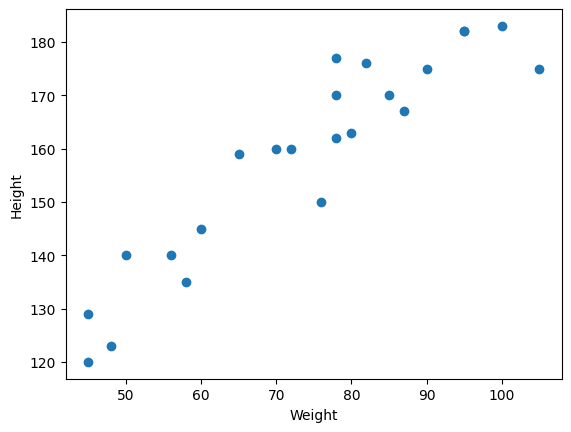

In [6]:
# to see relationship between weight and height
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

#### <span style="color:red;">Obs:</span> We can see that as weight is increasing, height is also increasing. This is a kind of a linear relationship.

In [7]:
# correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


#### <span style="color:red;">Obs:</span>
- Weight w.r.t Height is highly positively correlated.
- Height w.r.t Weight is highly positively correlated.

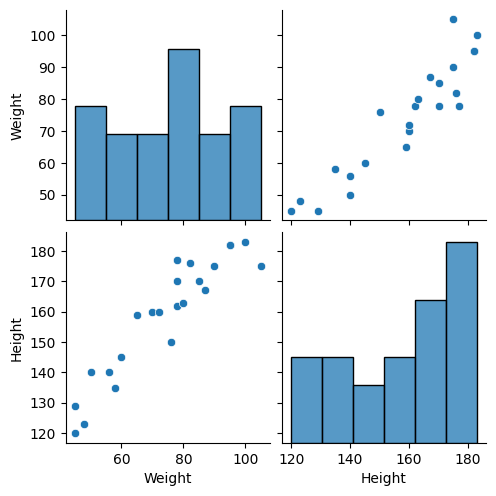

In [8]:
# shows correlation in a diagramtic way
sns.pairplot(df)

---

### First step to start with Linear Regression:

#### Step 1: Divide features into independent and dependent features

In [9]:
# wrong way
X = df['Weight']
print(type(X))

print(type(df))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [10]:
# right way
X = df[['Weight']]
print(type(X))

<class 'pandas.core.frame.DataFrame'>


#### **<span style="color:red;">Note:</span>** Independent feature should be dataframe or 2-dimensional array.

In [11]:
# 1-d array  (Never use this format)
X_series = df['Weight']
np.array(X_series).shape

(23,)

In [12]:
# 2-d array  (This format can be used)
X = df[['Weight']]
np.array(X).shape

(23, 1)

#### **<span style="color:red;">Note:</span>** Dependent feature can be in a series or 1-dimension. Because it will be a one column values to predict.

In [13]:
y = df['Height']
print(type(y))

<class 'pandas.core.series.Series'>


#### Step 2: Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)

#### Step 3: Standardization

- Standardization is used to scale the features so they are on the same level. Convert all values with mean = 0 and standard deviation = 1. To do this Z-score is used.
- Example:
    - Input feature - unit (kg)
    - Output feature - unit (cm).
    - The input feature will be scaled to (cm).

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Step 4: Apply Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

#### **<span style="color:red;">Note:</span>** While using any library of sklearn, first initialize the object.

In [24]:
regression = LinearRegression(n_jobs = -1)

In [25]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [27]:
print("Coefficient or slope:", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient or slope: [17.59928761]
Intercept: 157.23529411764707


#### Step 5: Plot best fit line w.r.t training data

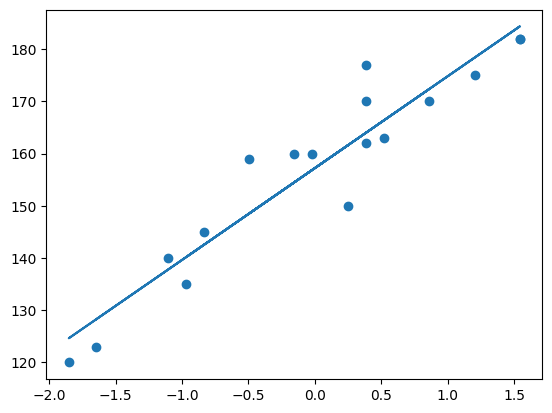

In [29]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

#### Step 6: Prediction for test data

1. Predicted height = intercept + coef_(Weights)
2. y_pred_test = 157.23 + 17.59(X_test)

In [31]:
y_pred = regression.predict(X_test)

#### Step 7: Check accuracy with Performance Metrics

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

121.11059607743948
9.557572184332976
11.005025946241085


In [43]:
score = r2_score(y_test, y_pred)
print(score)

0.6976434494599292


#### Adjusted R2 formula:
1 - [(1-R2)*(n-1) / (n-k-1]

In [44]:
1 - (1 - score) * (len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

0.6220543118249114

## **Linear Regression with OLS**

In [45]:
import statsmodels.api as sm

In [46]:
model = sm.OLS(y_train, X_train).fit()

In [48]:
prediction = model.predict(X_test)
print(prediction)

[ 39.06090067  17.56335462 -26.6260456   33.0893601  -32.59758617
  11.59181405]


In [49]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.049
Method:                 Least Squares   F-statistic:                             0.2002
Date:                Wed, 11 Dec 2024   Prob (F-statistic):                       0.661
Time:                        05:14:09   Log-Likelihood:                         -110.12
No. Observations:                  17   AIC:                                      222.2
Df Residuals:                      16   BIC:                                      223.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


#### Prediction for new data

In [50]:
# without standardization
regression.predict([[72]])

array([1424.38400201])

- Weight - 72
- Height - 1424
- The above output for predicted height is incorrect because the values are not standardized.

In [51]:
# with standardization
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([156.88402703])

- Weight - 72
- Height - 156